## Code 2

I will first generalise this Boundary value problem.
$$y^{''} + a y^{'} + b y = c x$$

Writing down the finite difference for each terms gives us,

$$ \frac{f_{i+1} - 2 f_{i} + f_{i-1}}{h^2} + a \frac{f_{i+1}-f_{i}}{h} + b f_i = c x_i$$

On simplifying, one gets:

$$f_{i+1}(1+a h) + f_i ( bh^2 - ah - 2) + f_{i-1} = c x_i$$

Using the boundary conditions we get a set of equations:


\begin{align}
Y_1 &= BV_1 \\
Y_3(1+ah) + Y_2(b h^2 - ah -2) + Y_1 &= c X_2 h^2\\
\cdots \\
Y_{M+1}(1+ah) + Y_M(b h^2 - ah -2) + Y_{M-1} &= c X_M h^2\\
Y_{M+1}& = BV_2
\end{align}

Where $BV_1$ and $BV_2$ are the boundary values. This forms a Matrix equation $A \cdot Y = X$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

$$X_i = (i-1) h$$

Where, h = 1/M and i runs from $0,1,2 \cdots M+1$ such that the interval for the problem is [0,1]

To ensure 4 signficant figures of accuracy, we take $M = 100$ such that $dx=0.01$. Since the error involved in the finite difference is $h^2$ this ensures an accuracy of $dx^2 = 0.0001$

In [3]:

J = 100
dx = 1.0/J
x = np.linspace(0, 1, J+1).transpose()

In [5]:
aa = 3
bb = -5
cc = 7

BV1 = -20
BV2 = 100

In [6]:
b = np.zeros((J+1, 1)).ravel()
b[1:J] = cc*dx**2*x[1:J]

In [7]:
b[0] = BV1
b[J] = BV2

In [8]:
bb*dx**2-aa*dx-2

-2.0305

In [9]:
main_diag = (bb*dx**2-aa*dx-2)*np.ones((J+1, 1)).ravel()
off_diag1 = (1+aa*dx)*np.ones((J, 1)).ravel()
off_diag2 = 1.0*np.ones((J, 1)).ravel()

a = main_diag.shape[0]

diagonals = [main_diag, off_diag2, off_diag1]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray() #Making the tridiagonal matrix
A[0, 0] = 1
A[0, 1] = 0
A[J, J] = 1
A[J, J-1] = 0

In [10]:
y = np.linalg.solve(A,b) #solving the matrix equation to get Y

xf = np.linspace(0,1,1001)

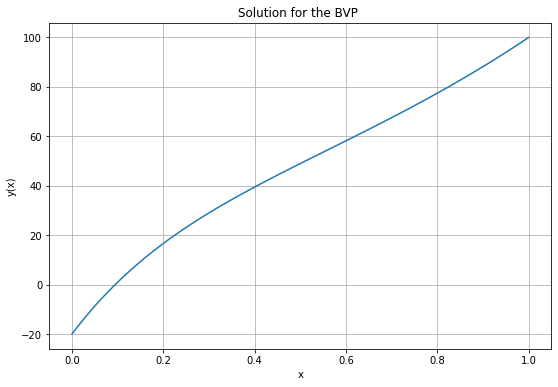

In [22]:
plt.figure(figsize=[9,6])
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("Solution for the BVP ")
plt.grid()
plt.savefig("yxsoln.pdf")

In [12]:
y

array([-20.        , -17.58641299, -15.25165493, -12.99228965,
       -10.80501768,  -8.68667063,  -6.63420586,  -4.64470132,
        -2.71535066,  -0.84345844,   0.97356437,   2.73820475,
         4.45285182,   6.11980084,   7.74125708,   9.31933948,
        10.8560842 ,  12.35344805,  13.81331171,  15.23748289,
        16.62769933,  17.98563164,  19.31288613,  20.61100743,
        21.88148102,  23.12573572,  24.34514597,  25.54103415,
        26.71467269,  27.86728617,  29.00005327,  30.11410874,
        31.21054516,  32.29041478,  33.35473111,  34.40447062,
        35.44057425,  36.46394894,  37.47546899,  38.47597753,
        39.46628774,  40.44718421,  41.41942407,  42.38373822,
        43.34083241,  44.29138835,  45.23606468,  46.17549805,
        47.11030399,  48.04107786,  48.96839574,  49.89281523,
        50.81487629,  51.73510202,  52.65399938,  53.57205993,
        54.48976049,  55.40756383,  56.32591928,  57.24526337,
        58.16602039,  59.08860294,  60.0134125 ,  60.94

The above is the solution Matrix which well enough has above 4 significan digits of accuracy